In [85]:
import numpy as np
import matplotlib.pyplot as plt
import os

filer = sorted(os.listdir('datafiler2'))
number = np.arange(0,11)

L = 100 #mm

b = np.array([ 19.6, 19.6, 19.6, 19.6, 19.6, 19.6, 19.6, 7.6, 8.0, 7.8, 7.88])
h = np.array([  2.1,  2.1,  2.1,  2.1,  2.1,  4.2,  6.3, 2.2, 2.2, 2.2,  4.4])
I = (b*h**3)/12
z_max = h/2
Z = I/z_max

samples = []
for f in filer:
    data = np.genfromtxt('datafiler2/'+f)
    tmpdict = {}
    tmpdict["force"] = data[:,1]
    tmpdict["uncorrdisp"] = data[:,0]
    tmpdict["disp"] = tmpdict["uncorrdisp"] -0.00075*tmpdict["force"] #korrigering for forskyvingen i maskinen
    samples.append(tmpdict)
print(z_max)

def stats(arr):
    minArr = np.min(arr)
    maxArr = np.max(arr)
    meanArr = np.mean(arr)
    stdArr = np.std(arr)
    karrArr = meanArr - 3.8*stdArr

    #print("Kulepassering, BSF = %.2f Hz" % BSF)
    print("Min = %.2f MPa" % minArr)
    print("Max = %.2f MPa" % maxArr)
    print("Mean = %.2f MPa" % meanArr)
    print("Std = %.2f" % stdArr)
    print("Karr = %.2f MPa" % karrArr)

[1.05 1.05 1.05 1.05 1.05 2.1  3.15 1.1  1.1  1.1  2.2 ]


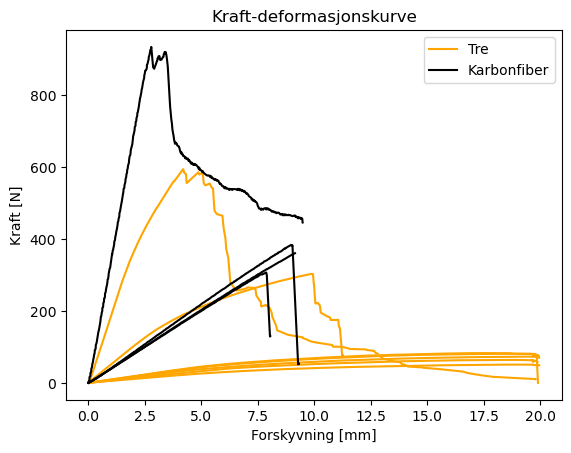

In [110]:

for i, sample in enumerate(samples[0:7]):
    # Add label only for the first plot
    label = 'Tre' if i == 0 else None
    plt.plot(sample["disp"], sample["force"], color='orange', label=label)

for i, sample in enumerate(samples[7:11]):
    # Add label only for the first plot
    label = 'Karbonfiber' if i == 0 else None
    plt.plot(sample["disp"], sample["force"], color='black', label=label)

#plt.xlim(0,5)
#plt.ylim(0,500)
plt.title("Kraft-deformasjonskurve")
plt.xlabel("Forskyvning [mm]")
plt.ylabel("Kraft [N]")
plt.legend()
plt.savefig("oversikt.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [95]:
displacmentStart = 0.25
displacmentEnd = 1.25
E = []

for i in number:
    sample = samples[i]
    indexStart = np.where(sample["disp"]> displacmentStart)[0][0]
    indexStop = np.where(sample["disp"]> displacmentEnd)[0][0]
    forceStart = sample["force"][indexStart]
    forceStop = sample["force"][indexStop]
    slope = (forceStop - forceStart)/(displacmentEnd - displacmentStart)
    E.append(slope*L**3/(48*I[i]*1e3))
stats(E[0:7])
stats(E[7:11])

Min = 7.21 MPa
Max = 12.86 MPa
Mean = 10.17 MPa
Std = 1.84
Karr = 3.17 MPa
Min = 120.13 MPa
Max = 129.18 MPa
Mean = 123.91 MPa
Std = 3.89
Karr = 109.13 MPa


In [91]:
flytestyrkeSprø = []

for i in range(7,11):
    sample = samples[i]
    maxForce = np.max(sample["force"])
    moment = maxForce*L/4 # Nmm
    flytestyrkeSprø.append(moment/Z[i])

stats(flytestyrkeSprø[0:4]) 

Min = 918.87 MPa
Max = 1486.67 MPa
Mean = 1273.00 MPa
Std = 222.28
Karr = 428.35 MPa


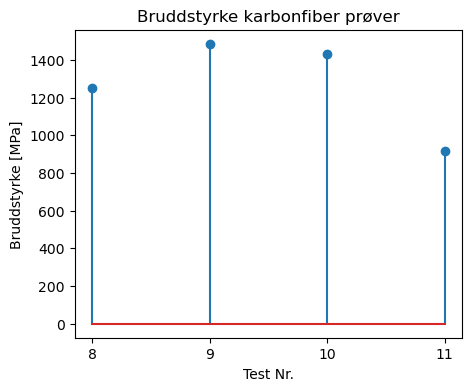

In [105]:
plt.figure(figsize=(5,4))
plt.stem(number[7:11]+1, flytestyrkeSprø)
plt.xticks(np.arange(8, 12, 1))
plt.ylabel('Bruddstyrke [MPa]')
plt.xlabel('Test Nr.')
plt.title('Bruddstyrke karbonfiber prøver')
#plt.grid(True)
plt.savefig("bruddstyrke.pdf", format="pdf", bbox_inches="tight")
plt.show()

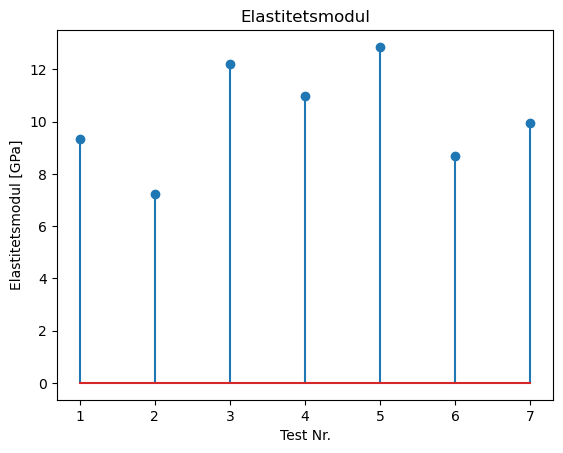

10.170971968057176
123.91050232016136


In [21]:
plt.stem(number[0:7] +1, E[0:7])
#plt.ylim(180,205)
plt.title("Elastitetsmodul")
plt.ylabel("Elastitetsmodul [GPa]")
plt.xlabel("Test Nr.")
plt.savefig("emod-tre.pdf", format="pdf", bbox_inches="tight")
plt.show()
print(np.mean(E[0:7])) 
print(np.mean(E[7:11]))

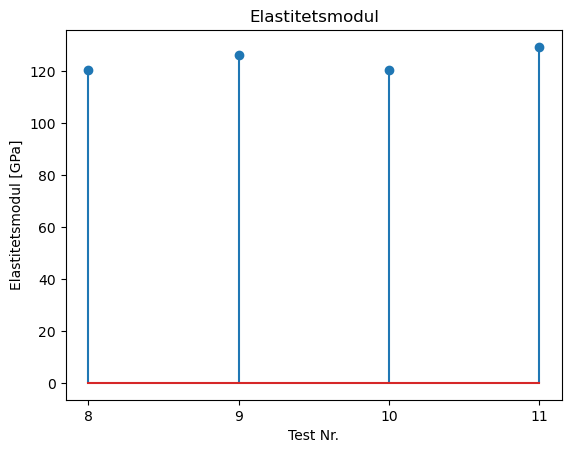

123.91050232016136


In [24]:
plt.stem(number[7:11] +1, E[7:11])
#plt.ylim(180,205)
plt.title("Elastitetsmodul")
plt.ylabel("Elastitetsmodul [GPa]")
plt.xlabel("Test Nr.")
plt.xticks(np.arange(8, 12, 1))
plt.savefig("emod-karbonfiber.pdf", format="pdf", bbox_inches="tight")
plt.show()
print(np.mean(E[7:11]))

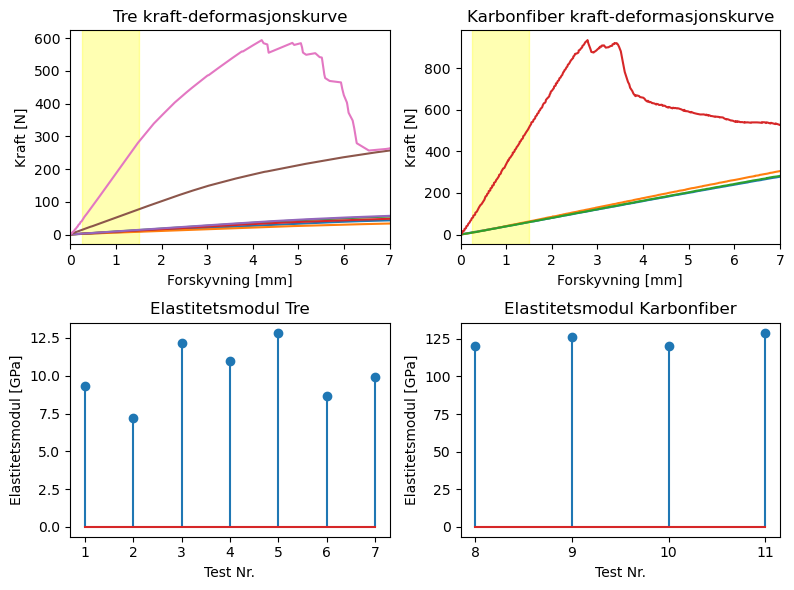

In [49]:

plt.figure(figsize=(8, 6))

plt.subplot(2,2,1)
for sample in samples[0:7]:
    plt.plot(sample["disp"], sample["force"])
plt.xlim(0,7)
#plt.ylim(0,500)
plt.axvspan(0.25, 1.5, color='yellow', alpha=0.3)
plt.title("Tre kraft-deformasjonskurve")
plt.xlabel("Forskyvning [mm]")
plt.ylabel("Kraft [N]")

plt.subplot(2,2,2)
for sample in samples[7:11]:
    plt.plot(sample["disp"], sample["force"])
plt.axvspan(0.25, 1.5, color='yellow', alpha=0.3)
plt.xlim(0,7)
#plt.ylim(0,500)
plt.title("Karbonfiber kraft-deformasjonskurve")
plt.xlabel("Forskyvning [mm]")
plt.ylabel("Kraft [N]")

# Setup for plot 1
plt.subplot(2, 2, 3) # 1 row, 2 columns, 1st subplot
plt.stem(number[0:7] + 1, E[0:7])
plt.title("Elastitetsmodul Tre")
plt.ylabel("Elastitetsmodul [GPa]")
plt.xlabel("Test Nr.")
plt.xticks(np.arange(1, 8, 1))

# Setup for plot 2
plt.subplot(2, 2, 4) # 1 row, 2 columns, 2nd subplot
plt.stem(number[7:11] + 1, E[7:11])
plt.title("Elastitetsmodul Karbonfiber")
plt.ylabel("Elastitetsmodul [GPa]")
plt.xlabel("Test Nr.")
plt.xticks(np.arange(8, 12, 1))



# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("emod.pdf", format="pdf", bbox_inches="tight")
# Show plots
plt.show()



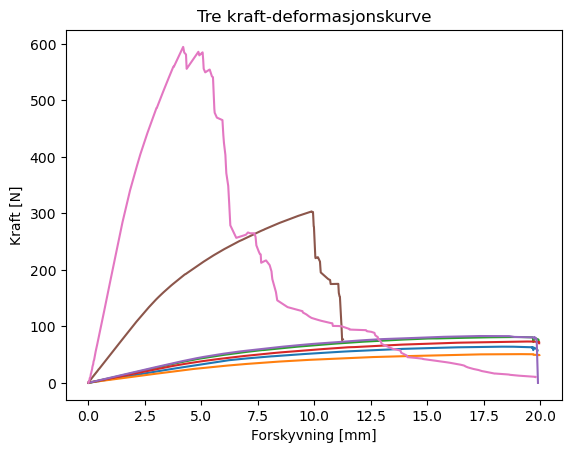

In [12]:
for sample in samples[0:7]:
    plt.plot(sample["disp"], sample["force"])
#plt.xlim(0,5)
#plt.ylim(0,500)
plt.title("Tre kraft-deformasjonskurve")
plt.xlabel("Forskyvning [mm]")
plt.ylabel("Kraft [N]")
plt.savefig("tre.pdf", format="pdf", bbox_inches="tight")
plt.show()

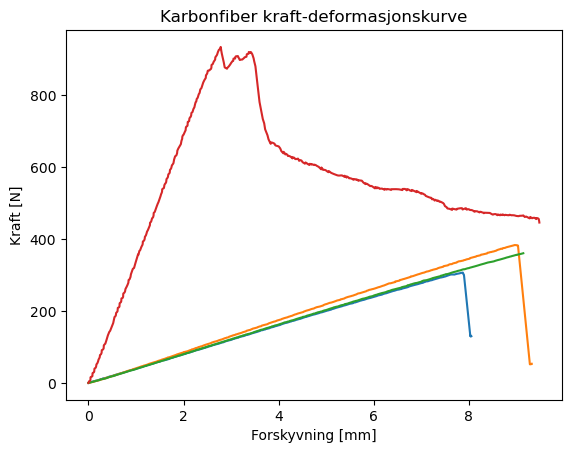

In [13]:
for sample in samples[7:11]:
    plt.plot(sample["disp"], sample["force"])
#plt.xlim(0,5)
#plt.ylim(0,500)
plt.title("Karbonfiber kraft-deformasjonskurve")
plt.xlabel("Forskyvning [mm]")
plt.ylabel("Kraft [N]")
plt.savefig("karbonfiber.pdf", format="pdf", bbox_inches="tight")
plt.show()